<h1>1. Square Root 2</h1>

Task: Write a Python function called sqrt2 that calculates and prints to the screen the square root of 2 to 100 decimal places. Your code should not depend on any module from the standard library or otherwise. You should research the task first and include references and a description of your algorithm.

The square root of 2 to 100 decimal places is 1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727[<sup>1</sup>](https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil)

There are several methods in Python that can be used to calculate the square root, but these need to be imported from modules such as *math* or *numpy*. However, the square root of 2 can also be calculated as the one-half power of 2[<sup>2</sup>](https://en.wikipedia.org/wiki/Square_root_of_2) since

$${X^\frac{1}{2} * X^\frac{1}{2}  = X^\frac{1+1}{2}  = X^1}$$ 

Thus it can be simply calculated as follows:

In [1]:
# Calculating square root 2 with half exponent
exp_half = 2 ** .5
exp_half

1.4142135623730951

This gives the square root of 2 without using any imported libraries but the returned value doesn't satisfy the requirement of 100 decimal places and the final 16th digit is a 1 rather than the expected 0. Perhaps this could simply be reformatted to display 100 decimal places.  

In [2]:
# Formatting to 100 decimal places
"{:.100f}".format(exp_half)

'1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000'

While more decimal places are returned here, they appear to become incorrect after the 15<sup>th</sup> digit. This is due to the difficulty of computing floating point numbers and compounded by the fact that root 2 is an irrational number, seemingly infinite with no repeating pattern. 

Binary expresses real numbers in base 2 and so decimal fractions are expressed as base 2 fractions. If the denominator of the decimal fraction to be expressed is a power of 2, they can be represented accurately[<sup>3</sup>](https://stackoverflow.com/a/588014) but other numbers can only be approximated and rounding errors are inherent to their calculation.[<sup>4</sup>](https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html)

The example below demonstrates these errors. While 1.5 - 1.0 == 0.5 returns as True, 1.2 - 1.0 == 0.2 returns as False. This is because 0.5 = 1/2 so the denominator can be expressed as a power of 2 but 0.2 = 1/5, which cannot be represented as a power of 2 and so this number can only be approximated. The estimation appears accurate at first but as the number of values after the decimal point increases, the precision decreases. The same thing happened in the calculation above - the values are correct up to the 15<sup>th</sup> digit but then become inaccurate.

In [3]:
# Demonstrating issues with floating point number calculations
print("Is 1.5 - 1.0 == 0.5?")
print(1.5 - 1.0 == 0.5)
print("")

print("Is 1.2 - 1.0 == 0.2?")
print(1.2 - 1.0 == 0.2)
print("")

print("What is 1.2 - 1.0?")
print(1.2 - 1.0)
print("")

print("Expressing 1.5 and 1.2 to 1 decimal place:")
print(1.5)
print(1.2)
print("")

print("Expressing 1.5 and 1.2 to 10 decimal places:")
print("{:.10f}".format(1.5))
print("{:.10f}".format(1.2))
print("")

print("Expressing 1.5 and 1.2 to 20 decimal placs:")
print("{:.20f}".format(1.5))
print("{:.20f}".format(1.2))

Is 1.5 - 1.0 == 0.5?
True

Is 1.2 - 1.0 == 0.2?
False

What is 1.2 - 1.0?
0.19999999999999996

Expressing 1.5 and 1.2 to 1 decimal place:
1.5
1.2

Expressing 1.5 and 1.2 to 10 decimal places:
1.5000000000
1.2000000000

Expressing 1.5 and 1.2 to 20 decimal placs:
1.50000000000000000000
1.19999999999999995559


While the previous calculation of root 2 became inaccurate after a certain number of values, it looks like the program stopped calculating values altogether and returned only zeros after the 52<sup>nd</sup> digit.

This is because there is a finite number of bits in which to store floating point numbers. Most machines today store floats in 53 bits, which is why the answer above ends with these trailing zeros.[<sup>5</sup>](https://docs.python.org/3.4/tutorial/floatingpoint.html) It is not possible to store an irrational number such as root 2 in bits as it would require storing something infinite into a finite amount of space.   

Since the issues arising here seem to come from the computational difficulty in calculating a floating point number, perhaps presenting the number 2 as a very large integer (2 with a lot of zeros) will bypass the issue. The returned value needs to have 100 decimal places so 200 zeros are tacked on to 2 and the square root of this number is calculated. Below again uses the 0.5 exponent to calculate the square root.

In [4]:
# Add 200 zeros to 2 to get integer square root 
large_int = 2* 10**200 
exp_int = large_int ** .5

exp_int

1.414213562373095e+100

The answer is so large that it's returned as an exponent. The number is formatted below to view it in its entirety, this time without specifying the number of decimal places as is should display an integer.  

In [5]:
# Format to view value above without exponent
'{:f}'.format(exp_int)

'14142135623730950271424125632818586983491648817919875481779003888601306842716543030228210043498528768.000000'

While this method appears to return the required number of digits, albeit in integer form, the values again become incorrect after the 15th digit. Because this method multiplies the large integer representation of 2 by a floating point number (0.5) to get the square root, the problems with computing floating point numbers again come into play. 

Looking at algorithmic options for calculating the square root may help to solve this issue. The first one I examined was the long division method. This algorithm works as follows:[<sup>6</sup>](https://www.geeksforgeeks.org/square-root-of-2/) 

1. Divide the number into groups of two - for square root 2 the first digit pair is 02 and it is followed by a number of zeros after a decimal point that is double the number of decimal places required in the answer.
2. Find the highest number that, when squared does not exceed the first pair of digits. This becomes the divisor and the first digit of the answer (1 in this case). 
3. Subtract this number from the first number pair (02 - 1 = 1) and bring down the next pair of digits (00). This number is the dividend in the next step (100).
4. To get the divisor for this number first multiply the quotient by 2 (1 * 2 = 2) and write the result in the tens place. 
5. To get the ones value, repeat step 2. In this case, 4 becomes the next digit in the answer.
    - 21 * 1 = 21
    - 22 * 2 = 44
    - 23 * 3 = 69
    - 24 * 4 = 96
6. Perform step 3 again, subtracting the numbers (100 - 96 = 4) and bringing the next pair down beside the answer (400).
7. Perform step 4 again, multiplying the quotient by 2 (14 * 2 = 28), which will form the hundreds and tens part of the divisor. 
8. Repeat step 2 again to get the ones value in the same way as step 5.
9. Keep cycling through the steps until you have reached the required number of decimal places. 

Here is a visual representation of the above explanation:

![Long Division Square Root](https://cdn1.byjus.com/wp-content/uploads/2018/11/maths/2018/07/10062902/Square-Root-Of-2.png)

This method is useful for manual calculation[<sup>7</sup>](https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Digit-by-digit_calculation) but makes for a long-winded computer program.[<sup>8</sup>](https://www.geeksforgeeks.org/long-division-method-to-find-square-root-with-examples/)    

One of the most common algorithms, and one perhaps better suited to computation than the long division method,[<sup>9</sup>](https://www.whitman.edu/mathematics/calculus_online/section06.03.html) is Newton's Method.  This works by calculating successively better approximations of the square root to find the correct answer.[<sup>10</sup>](https://en.wikipedia.org/wiki/Newton%27s_method)

- Starting with the original number (x), make an estimation of its square root (y). 
- Improve the estimate by taking the mean of the old estimate (y) and the value of the original number divided by the estimate (x/y): 

$$\frac{y + \frac{x}{y}}{2}$$

- The result of this becomes the new estimate and the process is repeated until the equation is solved or the desired number of decimal places is achieved.[<sup>11</sup>](https://www.coursera.org/lecture/progfun1/lecture-1-5-example-square-roots-with-newtons-method-FQDE1) 

Using x=2 as an example, this would work out as follows


|Estimate (y)   |New Estimate (y + x/y)/2   |
|---|---|
|1   |1.5   |
|1.5   |1.4167   |
|1.4167   |1.4142   |
|....   |....   |

The function below[<sup>12</sup>](https://stackoverflow.com/a/5189881) [<sup>13</sup>](https://stackoverflow.com/a/8646495) works by first multiplying the original number by 10 to the power of double the number of decimal places required, i.e. if we want 100 decimal places in our answer, we need 200 zeros tacked on to the number 2. The aim is to get an integer square root, similar to what was previously attempted above but with the Newtonian method. By using floor division to get the mean for each successive estimate, it avoids the use of floating point numbers altogether, and thus the issues that arise with them. The code continues to refine the estimation until the old and new estimates match, which occurs once the number of digits required is reached. The returned integer value is 101 digits long, including the number that will fall in front of the decimal. To present the final answer, the returned value of this function is reformatted as a string to include a decimal point.    

In [6]:
# Square root function
# Adapted from https://stackoverflow.com/a/5189881 and https://stackoverflow.com/a/8646495
def sqrt2(digits):
    # Create integer value for 2 with 200 zeros
    a = 2 * (10**(2*digits))
   
    # Variables to hold old and new estimates
    x_prev = 0                
    x_next = 1 * (10**digits) 
    
    # Loop until old and new estimates are equal
    while x_prev != x_next:    
        # Old estimate becomes new estimate
        x_prev = x_next 
        # Use floor division to perform Newtonian calculation to get the new estimate
        x_next = (x_prev + (a // x_prev)) // 2 
    return x_next

# Running the code
x = sqrt2(100)
print(x)
print("")

# Reformatting integer to string to get length and add decimal
x = str(x)
print("Number of digits: " + str(len(x)) +"\n")
sqrt2 = x[0]+"."+x[1:]

# Print answer
print("Answer", sqrt2)

# Square root of 2 copied from https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil
stringsqrt2 = "1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727"

# Returns true if answer matches square root of 2
sqrt2 == stringsqrt2

14142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727

Number of digits: 101

Answer 1.4142135623730950488016887242096980785696718753769480731766797379907324784621070388503875343276415727


True

## References

1. Square root of 2: https://apod.nasa.gov/htmltest/gifcity/sqrt2.1mil
2. Half power of 2: https://en.wikipedia.org/wiki/Square_root_of_2
3. Base 2 fractions: https://stackoverflow.com/questions/588004/is-floating-point-math-broken/588014#588014
4. Rounding errors: https://docs.oracle.com/cd/E19957-01/806-3568/ncg_goldberg.html
5. Storing floating point numbers: https://docs.python.org/3.4/tutorial/floatingpoint.html
6. Explanation of long division method: https://www.geeksforgeeks.org/square-root-of-2/
7. Manual calculation: https://en.wikipedia.org/wiki/Methods_of_computing_square_roots#Digit-by-digit_calculation
8. Long division program example: https://www.geeksforgeeks.org/long-division-method-to-find-square-root-with-examples/
9. Newton's Method computation https://www.whitman.edu/mathematics/calculus_online/section06.03.html
10. Newton's Method: https://en.wikipedia.org/wiki/Newton%27s_method
11. Explanation of Newton's method: https://en.wikipedia.org/wiki/Newton%27s_method
12. Code adaptation: https://stackoverflow.com/questions/5187664/generating-digits-of-square-root-of-2/5189881#5189881
13. Code adaptation: https://stackoverflow.com/questions/8646468/python-3-what-is/8646495#8646495

***

<h1>2. Chi Squared Test for Independence</h1>

Task: The Chi-squared test for independence is a statistical hypothesis test like a t-test. It is used to analyse whether two categorical variables are independent. The Wikipedia article gives the table below as an example, stating the Chi-squared value based on it is approximately 24.6. Use scipy.stats to verify this value and calculate the associated p value. You should include a short note with references justifying your analysis in a markdown cell.

|   |A   |B   |C   |D   |Total   |
|---|---|---|---|---|---|
|White Collar   |90   |60   |104   |95   |349   |
|Blue Collar   |30   |50   |51   |20   |151   |
|No Collar   |30   |40   |45   |35   |150   |
|Total   |150   |150   |200   |150   |650   |



There are certain criteria that data must meet to be suitable for Chi-squared testing. It should be random, categorical and drawn from a large enough sample of mutually exclusive independent variables such that every data point has a value greater than 5.[<sup>1</sup>](https://www.investopedia.com/terms/c/chi-square-statistic.asp) The above data satisfies these conditions: it takes a random sample of 650 people from a city of 1,000,000 and categorises each person based on their occupation (white collar, blue collar or no collar) and neighbourhood (A, B, C or D). These values are represented above in a contingency table, which has been recreated below as a pandas dataframe. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Creating dataframe to contain data
values = np.array([[90, 60, 104, 95], [30, 50, 51, 20], [30, 40, 45, 35]])

df = pd.DataFrame(values, index=["White Collar", "Blue Collar", "No Collar"],
                  columns=["A", "B", "C", "D"])          
df

,A,B,C,D
White Collar,90,60,104,95
Blue Collar,30,50,51,20
No Collar,30,40,45,35


Since White Collar data is represented more than Blue and No Collar combined, the data is plotted below as a stacked bar chart to show the proportions of each.[<sup>2</sup>](https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/)

Text(0, 0.5, 'Frequency')

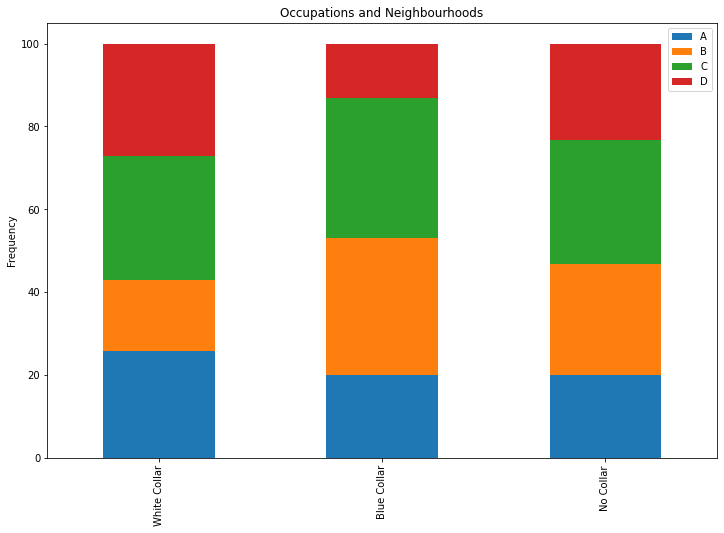

In [8]:
# Plotting data
# Adapted from: https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
stacked_data = df.apply(lambda x: x*100/sum(x), axis=1)
stacked_data.plot(kind="bar", stacked=True, figsize=(12,8))
plt.title("Occupations and Neighbourhoods")
plt.ylabel("Frequency")

Based on this plot, it appears that White Collar workers are more likely to live in neighbourhood D than Blue Collar workers while Blue Collar workers are more likely to live in neighbourhood B than White Collar workers. But can it be said based on this observation that there is a significant relationship here?

A null hypothesis assumes there is no relationship between these variables, that the neighbourhood a person lives in is not related to their occupation, while an alternative hypothesis would assume there is some kind of association between them. The Chi-squared test calculates the values that would be expected from the sample at each data point if the null hypothesis were true and compares them to the actual observed values.[<sup>3</sup>](https://www.statisticssolutions.com/non-parametric-analysis-chi-square/) Expected values are calculated for each data point by multiplying the total of a column by the total of a row and dividing it by the population of the sample. For example, to calculate the expected number of White Collar workers that would live in neighbourhood D if these variables were independent, we would need to multiply the total of column D (150) by the total of the White Collar row (349) and divide it by the total of the sample (650).[<sup>4</sup>](https://en.wikipedia.org/wiki/Chi-squared_test)

$${\frac{150 * 349}{650} = 80.54}$$

The expected value at this data point is 80.54 but the observed value is 95 meaning there is a difference of 14.46 between them. One of the results of a Chi-squared test is the Chi-squared statistic, which represents the differences between the observed and expected values for the whole dataset in a single value. The closer this value is to zero, the more aligned the observed and expected values are, and therefore it is more likely that the variables are independent from one another since they would be echoing the values determined by an assumption that the null hypothesis is true.[<sup>5</sup>](https://www.statisticshowto.com/probability-and-statistics/chi-square/)

At its most basic, the formula for the Chi-squared statistic is the sum of the squared difference between the observed and expected values for each data point divided by the expected values:[<sup>6</sup>](https://www.statisticshowto.com/wp-content/uploads/2013/09/chi-square-formula.jpg)

$${\chi}^2=\sum\frac{(O_i - E_i)^2}{E_i}$$

However, this statistic alone is not enough to indicate the independence of the variables - the significance of this value needs to be determined.

The **p-value** indicates the statistical significance of the Chi-squared value. It represents the probability that any extreme  differences seen between the observed and expected values occurred as a result of random chance.[<sup>7</sup>](https://www.investopedia.com/terms/p/p-value.asp) In other words, what are the chances that the actual values would have been measured if the variables were truly independent of one another? The smaller a p-value, the lower these chances and the more evidence there is to support the alternative hypothesis that there is a relationship between the variables.

The **critical value** represents a point beyond which the null hypothesis can be rejected, i.e. if the Chi-squared statistic is greater than this value, it is unlikely that the variables are independent.[<sup>8</sup>](https://www.statisticssolutions.com/non-parametric-analysis-chi-square/) A Chi-square table (below) can be used to determine the critical value, which is based on the degrees of freedom and the significance level.

![ChiSquareTable](https://www.statology.org/wp-content/uploads/2020/01/chi_square_table_small.jpg)


The **degrees of freedom** is a simple calculation that refers to the maximum number of independent values in the dataset that have the freedom to vary.[<sup>9</sup>](https://www.investopedia.com/terms/d/degrees-of-freedom.asp) In this case it is the multiplication of the number of rows (minus 1) and the number of columns (minus 1): (4-1)(3-1) = 6  

The **significance level** is related to the p-value. It is an arbitrary point, decided by researchers prior to beginning an analysis, below which they have determined the null hypothesis can be rejected.[<sup>10</sup>](https://www.statsdirect.com/help/basics/p_values.htm) If the p-value falls below the significance level, researchers can reject the null hypothesis and suspect that there may be a relationship between the variables. The significance level can be any value between 0 and 1 but typically values of 0.1, 0.05 or 0.01 are used as the threshold.[<sup>11</sup>](http://www.stat.yale.edu/Courses/1997-98/101/sigtest.htm) A p-value below a significance level of 0.05 indicates that there is a less than 5% chance that the null hypothesis is correct and that the observed data is a result of random chance. 

With a value of 6 degrees of freedom and significance levels of 0.1, 0.05, and 0.01, the table above suggests the critical value would be 10.645, 12.592 and 16.812 respectively for each of these values. As the significance level value gets smaller, the critical value gets larger[<sup>12</sup>](https://www.statology.org/chi-square-critical-value-python/) The task description states that the Chi-squared value of the data above should be 24.6 and so it looks like the null hypothesis will be rejected based on these critical values across the different significance levels. To look further into this, the Chi-squared test is performed below using scipy.stats. 

In [9]:
# Performing Chi2 test 
chi2_test = stats.chi2_contingency(df)
chi2_test

(24.5712028585826,
 0.0004098425861096696,
 6,
 array([[ 80.53846154,  80.53846154, 107.38461538,  80.53846154],
        [ 34.84615385,  34.84615385,  46.46153846,  34.84615385],
        [ 34.61538462,  34.61538462,  46.15384615,  34.61538462]]))

The test is very easy to run; just a single command performs all the calculations for the Chi-squared statistic, the p-value, the degrees of freedom and the expected values generated for this population. To make it easier to read, it is performed again below with each returned value being assigned to a variable.[<sup>13</sup>](https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b) 

In [10]:
# Performing Chi2 test and assigning results to different variables
# Adapted from https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b 

chi2_stat, p_val, dof, expected = stats.chi2_contingency(df)

# Printing each variable
print(f"Chi2 Statistic: {chi2_stat}\n")
print(f"Degrees of Freedom: {dof}\n")
print(f"P-Value: {p_val}\n")
print(f"Expected Values:\n {expected}")

Chi2 Statistic: 24.5712028585826

Degrees of Freedom: 6

P-Value: 0.0004098425861096696

Expected Values:
 [[ 80.53846154  80.53846154 107.38461538  80.53846154]
 [ 34.84615385  34.84615385  46.46153846  34.84615385]
 [ 34.61538462  34.61538462  46.15384615  34.61538462]]


These results confirm that the Chi-squared statistic is approximately 24.6 as outlined in the task description. It also shows that the degrees of freedom value is 6, which was previously calculated. The p-value is very low at 0.0004, indicating that it is highly unlikely that the null hypothesis is supported. Most researchers consider a p-value less than 0.05 to be statistically significant and a p-value less than 0.001 to be statistically highly significant.[<sup>14</sup>](https://www.statsdirect.com/help/basics/p_values.htm) The p-value for this data is even lower, representing a 4 in 10,000 chance that these values could occur if the null hypothesis was correct.

The critical value is not included in the above Chi-squared test but can be calculated using the function below.[<sup>15</sup>](https://www.statology.org/chi-square-critical-value-python/)

In [11]:
# Adapted from https://www.statology.org/chi-square-critical-value-python/

# Critical value p<0.05
critical1 = stats.chi2.ppf(1-.05, df=dof)
print(f"Critical Value p<0.05: {critical1}")

# Critical value p<0.005
critical2 = stats.chi2.ppf(1-.005, df=dof)
print(f"Critical Value p<0.005: {critical2}")

# Critical value p<0.0005
critical3 = stats.chi2.ppf(1-.0005, df=dof)
print(f"Critical Value p<0.0005: {critical3}")

Critical Value p<0.05: 12.591587243743977
Critical Value p<0.005: 18.547584178511087
Critical Value p<0.0005: 24.102798994983747


The three critical values calculated above using different significance levels are all lower than the Chi-squared statistic and so it is fair at this stage to reject the null hypothesis and state that a relationship exists between the variables.

The Chi-squared test also provides the expected values for each datapoint. These have been added to a dataframe below and merged with the observed values.[<sup>16</sup>](https://stackoverflow.com/a/44152479)

In [12]:
df2 = pd.DataFrame(expected, index=["White Collar Exp", "Blue Collar Exp", "No Collar Exp"],
                  columns=["A", "B", "C", "D"])
df2

,A,B,C,D
White Collar Exp,80.538462,80.538462,107.384615,80.538462
Blue Collar Exp,34.846154,34.846154,46.461538,34.846154
No Collar Exp,34.615385,34.615385,46.153846,34.615385


In [13]:
# Concatenating dataframes
# Adapted from https://stackoverflow.com/a/44152479
all_values = pd.concat([df, df2]).sort_index()
all_values.round(2)

,A,B,C,D
Blue Collar,30.00,50.00,51.00,20.00
Blue Collar Exp,34.85,34.85,46.46,34.85
No Collar,30.00,40.00,45.00,35.00
No Collar Exp,34.62,34.62,46.15,34.62
White Collar,90.00,60.00,104.00,95.00
White Collar Exp,80.54,80.54,107.38,80.54


As with the initial plot, the biggest differences between the observed and expected data are with Blue and White Collar workers in neighbourhoods B and D. According to the statistics measured above, it is highly unlikely that the data in this population sample would have occurred if the variables were independent from one another. There is certainly some kind of statistically significant relationship between the place a persons chooses to reside and their occupation. The nature of this relationship, however, is not discoverable by Chi-squared analysis.[<sup>17</sup>](https://stattrek.com/chi-square-test/independence.aspx) Based on the results of this analysis alone, it cannot be determined that a causal relationship exists between a person's job and the place they live. 

## References

1. Chi-square criteria: https://www.investopedia.com/terms/c/chi-square-statistic.asp
2. Stacked bar chart adapted from https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
3. Chi square null and alternative hypotheses: https://www.statisticssolutions.com/non-parametric-analysis-chi-square/
4. Expected values calculation: https://en.wikipedia.org/wiki/Chi-squared_test
5. About the Chi square statistic: https://www.statisticshowto.com/probability-and-statistics/chi-square/
6. Chi square statistic formula: https://www.statisticshowto.com/wp-content/uploads/2013/09/chi-square-formula.jpg
7. P value: https://www.investopedia.com/terms/p/p-value.asp
8. Critical value: https://www.statisticssolutions.com/non-parametric-analysis-chi-square/
9. Degrees of freedom: https://www.investopedia.com/terms/d/degrees-of-freedom.asp
10. Significance level: https://www.statsdirect.com/help/basics/p_values.htm
11. Typical significance level values: http://www.stat.yale.edu/Courses/1997-98/101/sigtest.htm
12. Significance level and critical value relationship: https://www.statology.org/chi-square-critical-value-python/
13. Chi-squared test code adapted from: https://towardsdatascience.com/running-chi-square-tests-in-python-with-die-roll-data-b9903817c51b
14. P value significance: https://www.statsdirect.com/help/basics/p_values.htm
15. Critical value code adapted from: https://www.statology.org/chi-square-critical-value-python/
16. Concatenate dataframes code adapted from: https://stackoverflow.com/a/44152479
17. Chi-squared limitation: https://stattrek.com/chi-square-test/independence.aspx

***

<h1>3. Standard Deviation </h1>

Task: The standard deviation of an array of numbers x is calculated using numpy as np.sqrt(np.sum((x - np.mean(x))^2)/len(x)).
However, Microsoft Excel has two different versions of the standard deviation calculation, STDEV.P and STDEV.S . The STDEV.P function performs the above calculation but in the STDEV.S calculation the division is by len(x)-1 rather than len(x) . Research these Excel functions, writing a note in a Markdown cell about the difference between them. Then use numpy to perform a simulation demonstrating that the STDEV.S calculation is a better estimate for the standard deviation of a population when performed on a sample. Note that part of this task is to figure out the terminology in the previous sentence.

The standard deviation (SD) is a measurement of variability that allows us to see how spread out a set of values are from their mean.[<sup>1</sup>](https://www.mathsisfun.com/data/standard-deviation.html) A large SD means that values are quite spread out, while a smaller one indicates they are more bunched together. The formula to calculate the SD is as follows:[<sup>2</sup>](https://www.mathsisfun.com/data/standard-deviation-formulas.html)

- Calculate the mean of the data.
- Calculate the distance between each value and the mean. 
- Square each of these numbers and then add them all together.
- Divide by the number of data points.
- Calculate the square root if this value. 

$$\sigma ={\sqrt {\frac {\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}}{N}}}$$

This formula works well if applied to a whole population but can be biased if it is used to estimate the SD of a population based on a sample of that population.[<sup>3</sup>](https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php) A sample does not contain all the values of a population and so extrapolating its SD can be problematic as it is often underestimated.[<sup>4</sup>](https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation) An adjustment is made to the above formula to account for this bias:

$$s={\sqrt {\frac {\sum _{i=1}^{n}(x_{i}-{\overline {x}})^{2}}{n-1}}}$$

This is called the Bessel's Correction and involves subtracting 1 from the number of data points prior to division into the sum of the squared differences.[<sup>5</sup>](https://en.wikipedia.org/wiki/Bessel%27s_correction) Excel has a function for each of these SD calculations: STDEV.P calculates the SD of a population and STDEV.S calculates the SD for a sample.[<sup>6</sup>](https://www.exceltip.com/statistical-formulas/how-to-use-excel-stdev-p-function.html) The values returned by STDEV.S will always be larger than the values returned by STDEV.P when used on the same data since it applies Bessel's correction, which accounts for the possibility there is more variation in the population than what is represented by the sample.[<sup>7</sup>](https://www.le.ac.uk/oerresources/ssds/numeracyskills/page_20.htm) The accompanying Excel spreadsheet demonstrates these functions in action (stdev.xlsx) and the image below shows some of the results

![excel_example](stdev_example.jpg)

In this example, a population of 50 numbers is generated using the RANDARRAY function. Sample sizes of the first 5, 10 and 20 values are taken from this population and both the STDEV.P and STDEV.S functions are applied to them. In each case the STDEV.S value is closer to the actual population's SD than the STDEV.P value, which seems to support the idea that it provides a better estimate. However, this is not consistently observed as the example below show that each of the sample population estimates exceed the population's SD and the results of STDEV.P appear closer to it than those of STDEV.S. 

![excel_example](stdev_example2.jpg)

This can happen when the values chosen for a sample are not very representative of the population.[<sup>8</sup>](https://www.investopedia.com/ask/answers/042915/whats-difference-between-representative-sample-and-random-sample.asp) The estimation of a population's SD is based on the mean of the sample and not the mean of the population and so the values chosen for the sample will have a significant effect on the figures. Calculating the standard error can indicate the reliability of the sample's mean, which impacts the accuracy of the SD.[<sup>9</sup>](https://www.greenbook.org/marketing-research/how-to-interpret-standard-deviation-and-standard-error-in-survey-research-03377) If this value is large, it indicates the sample is not very representative of the population but as the sample size increases, it gets closer to the size of the population and so the standard error should decrease.[<sup>10</sup>](https://s4be.cochrane.org/blog/2018/09/26/a-beginners-guide-to-standard-deviation-and-standard-error/) To illustrate this, a simple example is given below:

In [3]:
# Population
p = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20])

# Population mean and SD
p_mean = np.mean(p)
p_sdev = np.sqrt(np.sum((p - p_mean)**2)/len(p))

# First sample
s = np.array([2, 16, 18, 20])

# First sample mean and SD (calculated with sample SD formula)
s_mean = np.mean(s)
s_sdev = np.sqrt(np.sum((s - s_mean)**2)/(len(s)-1))

# Second sample
s2 = np.array([4, 8, 12, 18])

# Second sample mean and SD (calculated with sample SD formula)
s2_mean = np.mean(s2)
s2_sdev = np.sqrt(np.sum((s2 - s2_mean)**2)/(len(s2)-1))

# Calculating the standard errors of the samples
s_error = s_sdev/(np.sqrt(len(s)))
s2_error = s2_sdev/(np.sqrt(len(s2)))

# Printing the results
print(f"Population mean: {p_mean}")
print(f"Population SD: {p_sdev}")
print(f"\nSample 1 mean: {s_mean}")
print(f"Sample 1 SD: {s_sdev}")
print(f"\nSample 2 mean: {s2_mean}")
print(f"Sample 2 SD: {s2_sdev}")
print(f"\nSample 1 standard error: {s_error}")
print(f"Sample 2 standard error: {s2_error}")

Population mean: 11.0
Population SD: 5.744562646538029

Sample 1 mean: 14.0
Sample 1 SD: 8.16496580927726

Sample 2 mean: 10.5
Sample 2 SD: 5.972157622389639

Sample 1 standard error: 4.08248290463863
Sample 2 standard error: 2.9860788111948193


The first sample only contains values from the either end of the population, resulting in a larger mean and SD. The second sample is more spread out and is thus more in line with the actual mean and SD of the population. The higher standard error value indicates that sample 1 is a worse representation of the population than sample 2 and so the statistics of sample 2 should be considered a closer representation of the population parameters than sample 1.

Bessel's correction is useful if the sample of the population is of a good size and you're trying to approximate the parameters of the population; extremely small samples can be inaccurate (although possibly still closer to the population SD than without the correction), while large ones may be so close to the actual population size or so representative of the variance that the correction is unnecessary.[<sup>11</sup>](https://www.statisticshowto.com/bessels-correction/) Indeed, the Microsoft documentation for Excel's STDEV.P function states that STDEV.P and STDEV.S will return approximately equal values with large sample sizes.[<sup>12</sup>](https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285) 

Below I will investigate the application of a the population SD formula and the sample SD formula to samples of a population to see which is a better estimate of the population's SD. For simplicity, and because we are trying to mimic the behaviour of Excel's formulas, I will refer to them as STDEV.P and STDEV.S.

In the function below a sample of size n is taken from the population (p). STDEV.P and STDEV.S functions are applied to the sample and the values of each are subtracted from the SD of the population to see which is closer. The absolute difference is taken to avoid negative numbers. The function returns True if the STDEV.S function is more accurate and False if the STDEV.P function is more accurate. 

In [15]:
# Function to create samples and check if the STDEV.P or STDEV.S is closer to the populations SD
def compare_sdev(p, n):  
    
    # SD of the whole population (p)
    whole_pop_sdev = np.sqrt(np.sum((p - np.mean(p))**2)/len(p))
    
    # Sample population of size n - replace is set to False so values are only selected once
    sample = np.random.choice(p, size = n, replace=False)
    
    # Run STDEV.P and STDEV.S on the sample
    pop_sdev = np.sqrt(np.sum((sample - np.mean(sample))**2)/len(sample))
    samp_sdev = np.sqrt(np.sum((sample - np.mean(sample))**2)/(len(sample)-1))
    
    # Calculate the absolute difference between whole population SD and those calculated above
    pop_diff = abs(whole_pop_sdev - pop_sdev)
    samp_diff = abs(whole_pop_sdev - samp_sdev)   
    
    # Return True if the STDEV.P value is greater than than the STDEV.S value or False otherwise
    if pop_diff >= samp_diff:
        return True
    elif samp_diff > pop_diff:
        return False

Below another function is created which takes the population and a list of sample sizes to be passed to compare_sdev(). It also takes a parameter called num which dictates how many times compare_sdev() should be run for each sample size. Each time STDEV.P or  STDEV.S is closer to the population's SD, it is recorded and the results are plotted.[<sup>13</sup>](https://python-graph-gallery.com/11-grouped-barplot/)

In [16]:
# Function to run compare_sdev several times
def run_compare(pop, nlist, num):
    
    # Record the number of times STDEV.P or STDEV.S was closer to the population SD for each sample size
    p_closerlst = []
    s_closerlst = []
    
    # Run for different sample sizes
    for x in (nlist): 
        # Variable to record number of times STDEV.P or STDEV.S was closer to the population SD
        p_closer = 0
        s_closer = 0

        # Run compare_sdev() function num times
        for i in range(num):
            run_func = compare_sdev(pop, x)
            
            # Increment vairables based on function return
            if run_func is True:
                s_closer += 1
            elif run_func is False:
                p_closer += 1
        
        # Print results of STDEV.S
        print(f"n = {x}: STDEV.S is more accurate {s_closer} times out of {num}")
        
        # Append results to lists for each sample size
        p_closerlst.append(p_closer)
        s_closerlst.append(s_closer)

    # Plotting the results     
    # Adapted from https://python-graph-gallery.com/11-grouped-barplot/
    
    # Set figure size
    plt.figure(figsize=(12, 8))
    
    # Set bar width
    barWidth = 0.4

    # Set position of bar on X axis
    r1 = np.arange(len(p_closerlst))
    r2 = [x + barWidth for x in r1]

    # Create the plot
    plt.bar(r1, p_closerlst, color='orange', width=barWidth, edgecolor='white', label='STDEV.P')
    plt.bar(r2, s_closerlst, color='green', width=barWidth, edgecolor='white', label='STDEV.S')

    # Add xticks to the middle of the group bars
    plt.xlabel('Sample Size')
    plt.xticks([r + barWidth/2 for r in range(len(p_closerlst))], nlist)

    # Add title and legend
    plt.title("STDEV.P versus STDEV.S Standard Deviation Accuracy")
    plt.legend()
    
    # Display plot 
    plt.show()

A small population (N=100) of normally distributed values with a mean of 100 and a SD of 20 is created along with a list of sample sizes and both are passed to the run_compare() function. Note that, while the SD is set to 20 when creating the population, the actual SD will be a little bit under or over this figure. 

n = 5: STDEV.S is more accurate 662 times out of 1000
n = 10: STDEV.S is more accurate 607 times out of 1000
n = 20: STDEV.S is more accurate 580 times out of 1000
n = 30: STDEV.S is more accurate 549 times out of 1000
n = 40: STDEV.S is more accurate 553 times out of 1000
n = 50: STDEV.S is more accurate 499 times out of 1000
n = 60: STDEV.S is more accurate 477 times out of 1000


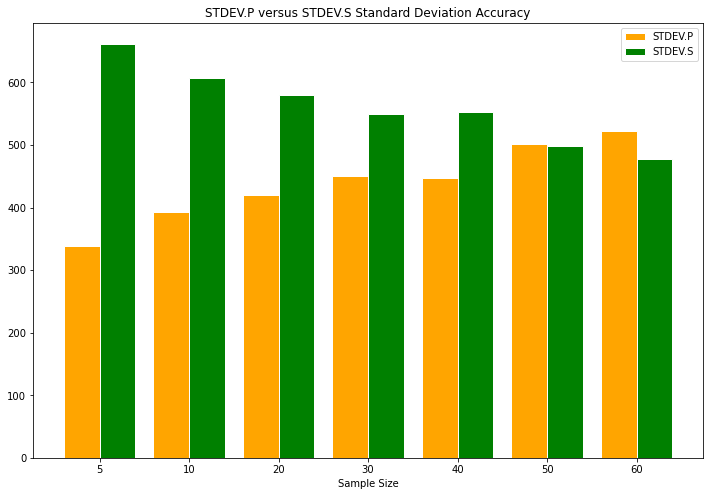

In [17]:
# Set mean and SD
mean = 100
sd = 20

# Create population from a normal distribution
pop = np.random.normal(mean, sd, size=100)

# Create list of samples sizes to pull from the population
xlist = [5, 10, 20, 30, 40, 50, 60]

# Pass these values to the run_compare() function and run compare_sdev() 1000 times
run_compare(pop, xlist, 1000)

While different results are returned every time the above code is run, there is an apparent trend: With the smaller sample sizes, STDEV.S is closer to the population's SD than STDEV.P. The value may not be a very accurate estimation, but generally it's more accurate than that returned by STDEV.P. As the sample sizes get larger, the differences between STDEV.P and STDEV.S shrink as the sample contains more values and thus becomes a better representation of the whole population.

Below, I run the code again with a larger population that has a different mean and SD. 

n = 10: STDEV.S is more accurate 613 times out of 1000
n = 50: STDEV.S is more accurate 533 times out of 1000
n = 100: STDEV.S is more accurate 546 times out of 1000
n = 500: STDEV.S is more accurate 506 times out of 1000
n = 1000: STDEV.S is more accurate 480 times out of 1000
n = 3000: STDEV.S is more accurate 487 times out of 1000
n = 5000: STDEV.S is more accurate 481 times out of 1000


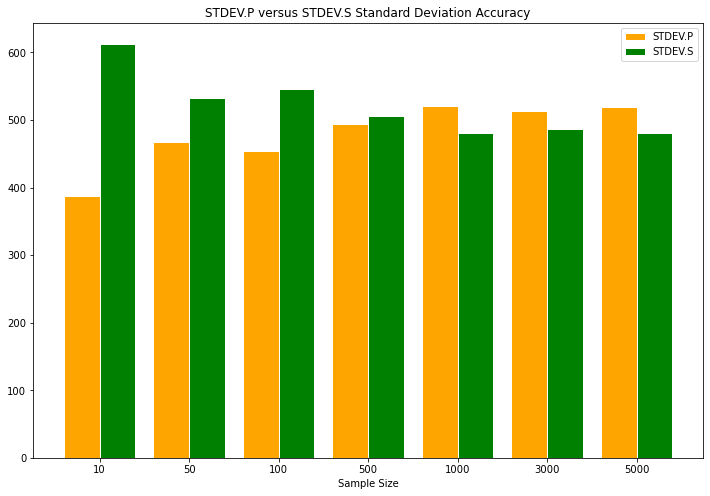

In [18]:
mean2 = 500
sd2 = 200

pop2 = np.random.normal(mean2, sd2, size=10000)
ylist = [10, 50, 100, 500, 1000, 3000, 5000]
run_compare(pop2, ylist, 1000)

The larger population and sample sizes make the differences between STDEV.P and STDEV.S shrink - except for smaller sample sizes. The examples above demonstrate that for relatively small sample sizes, STDEV.S provides a better estimate for the population's SD than STDEV.P but the differences can become negligible as the sample sizes becomes a greater proportion of the population.  

## References

1. Standard deviation definition: https://www.mathsisfun.com/data/standard-deviation.html
2. Standard deviation calculation: https://www.mathsisfun.com/data/standard-deviation-formulas.html
3. Standard deviation bias with sample: https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php
4. Underestimated standard deviation: https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation
5. Bessel's Correction: https://en.wikipedia.org/wiki/Bessel%27s_correction
6. Difference between STDEV.P and STDEV.S: https://www.exceltip.com/statistical-formulas/how-to-use-excel-stdev-p-function.html
7. STDEV.S estimation larger than STDEV.P to account for variation: https://www.le.ac.uk/oerresources/ssds/numeracyskills/page_20.htm
8. Representative sample: https://www.investopedia.com/ask/answers/042915/whats-difference-between-representative-sample-and-random-sample.asp
9. Reliability of sample's mean: https://www.greenbook.org/marketing-research/how-to-interpret-standard-deviation-and-standard-error-in-survey-research-03377
10. Standard error decreases as sample size increases: https://s4be.cochrane.org/blog/2018/09/26/a-beginners-guide-to-standard-deviation-and-standard-error/
11. When to use Bessel's Correction: https://www.statisticshowto.com/bessels-correction/
12. STDEV.P and STDEV.S with large samples: https://support.microsoft.com/en-us/office/stdev-p-function-6e917c05-31a0-496f-ade7-4f4e7462f285
13. Plotting adapted from: https://python-graph-gallery.com/11-grouped-barplot/

***

# 4. K-Means Clustering and Iris Data Set

Use scikit-learn to apply k-means clustering to Fisher’s famous Iris data set. You will easily obtain a copy of the data set online. Explain in a Markdown cell how your code works and how accurate it might be, and then explain how your model could be used to make predictions of species of iris.

The Iris data set is a multivariate data set consisting of the sepal and petal measurements of 150 iris flowers, 50 for each of three different species, setosa, versicolor and virginica. Below the data set is loaded, added to a dataframe and a sample is displayed.[<sup>1</sup>](http://www.philipkalinda.com/ds3.html) 

In [19]:
from sklearn import datasets
import seaborn as sns 
import sklearn.cluster as skcl

# Import Iris data set
iris = datasets.load_iris()

# Add data to a dataframe
iris_df = pd.DataFrame(data= iris.data, columns= iris.feature_names)

# Function to add species names to dataframe 
# Adapted from http://www.philipkalinda.com/ds3.html
def species_name(target):
    if target == 0:
        return iris.target_names[0]
    elif target == 1:
        return iris.target_names[1]
    elif target == 2:
        return iris.target_names[2]

# Add species names and target numbers to the dataframe
iris_df['species_id'] = iris.target
iris_df['species'] = [species_name(x) for x in iris.target]

iris_df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_id,species
124,6.7,3.3,5.7,2.1,2,virginica
83,6.0,2.7,5.1,1.6,1,versicolor
50,7.0,3.2,4.7,1.4,1,versicolor
118,7.7,2.6,6.9,2.3,2,virginica
27,5.2,3.5,1.5,0.2,0,setosa
76,6.8,2.8,4.8,1.4,1,versicolor
106,4.9,2.5,4.5,1.7,2,virginica
58,6.6,2.9,4.6,1.3,1,versicolor
110,6.5,3.2,5.1,2.0,2,virginica
51,6.4,3.2,4.5,1.5,1,versicolor


K-Means Clustering (KMC) is an unsupervised machine learning technique that breaks data up into a number (k) of clusters of similar objects around a central mean (known as the cluster center/centroid).[<sup>2</sup>](https://en.wikipedia.org/wiki/K-means_clustering) The algorithm works as follows:[<sup>3</sup>](https://towardsdatascience.com/how-does-k-means-clustering-in-machine-learning-work-fdaaaf5acfa0)

- Create a specified number of centroids, the same as the number of clusters you want from the data. 
    - Centroids can be chosen randomly or with k-means++. Random initial values for centroids can often result in poor clusterings whereas kmeans++ spreads out the initial centroids based on the data being used.[<sup>4</sup>](https://en.wikipedia.org/wiki/K-means%2B%2B)  The default centroid initialisation in sklearn is k-means++.[<sup>5</sup>](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- Measure the distance between each data point and each centroid. 
- Group data points together with their closest centroid.
- Calculate new centroids by using the sum of the points in each cluster divided by the number of values.
- Each data point is again grouped with the nearest new centroid.
- Repeat the steps until the specified number of iterations has been reached. In sklearn's algorithm the steps are run ten times by default the value with the lowest sum of squared errors (SSE) is returned.[<sup>6</sup>](https://realpython.com/k-means-clustering-python/) The SSE, referred to as inertia in KMC, measures the differences between each centroid and the data points.[<sup>7</sup>](https://scikit-learn.org/stable/modules/clustering.html)

Being unsupervised, KMC doesn't need to be trained by labelled data but rather processes raw data and draws a predetermined number of clusters from it. However, every entry in the Iris dataset is labelled by species of flower, so it could be said that "clusters" already exist. This dataset is visualised below. 

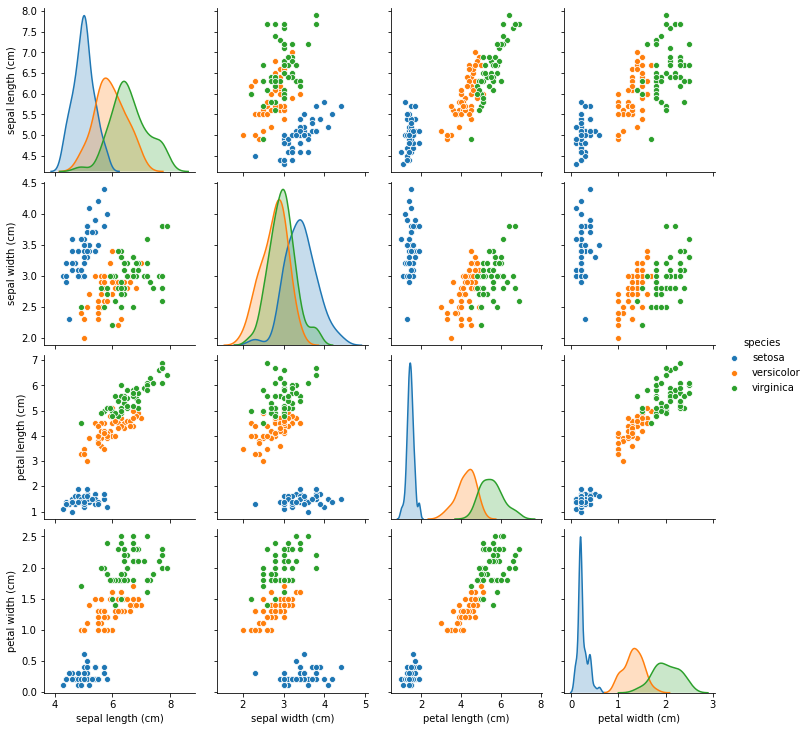

In [20]:
# Removing species ID for plotting
iris2 = iris_df.drop(['species_id'], axis=1)

# Plot measurements by species
iris_plot = sns.pairplot(iris2, hue = 'species')
   
plt.show()

From these plots, one cluster is certainly quite distinguishable from the others, the blue dots representing the setosa iris. However, versicolor and virginica seem more entangled, particularly in terms of sepal measurements. Given how KMC works, it seems like it would be very difficult to accurately cluster these measurements correctly around a central mean.

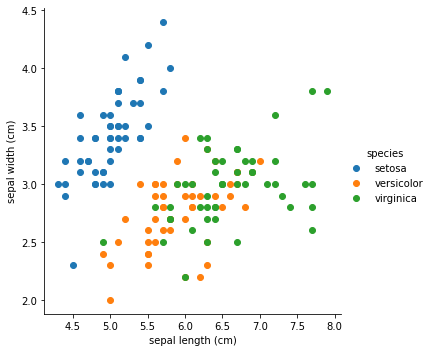

In [21]:
# Closer look at sepal measurements.
sns.FacetGrid(iris2, hue = 'species', height=5).map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)').add_legend()
plt.show()

Before beginning KMC analysis, the iris data set is split in the data (the measurements of each flower) and the targets (the species of flower).[<sup>8</sup>](https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee) Rather than by name, the species is represented numerically:
- 0 = setosa
- 1 = versicolor
- 2 = virginica

Unlike supervised machine learning algorithms, such as K-Nearest Neighbours which I have previously applied to the iris data set,[<sup>9</sup>](https://github.com/jennifer-ryan/iris-data-set-project) the data does not need to be split into training and testing data as it is attempting to make clusters from raw data and not trying to assign the data to known labels.[<sup>10</sup>](https://www.freecodecamp.org/news/how-to-build-and-train-k-nearest-neighbors-ml-models-in-python/)

In [22]:
# Iris data
X = iris.data
# Showing first 10 
X[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [23]:
# Species/target
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

It is important to determine how many clusters should be drawn from the data. In the case of the iris dataset, this may seem obvious as the data represents three species. However, it is best practice to determine the optimal number of clusters that works for the raw data.[<sup>11</sup>](https://realpython.com/k-means-clustering-python/) One of the most popular ways to do this is with the Elbow Method.[<sup>12</sup>](https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187) This runs KMC on the data for several values of k and plots the SSE for each one. The optimal value for k occurs at the "joint" of the elbow, where both the values of k and the SSE are relatively low. Increasing the value of k at this stage is not considered beneficial enough to be necessary.[<sup>13</sup>](https://stackoverflow.com/a/41525972)

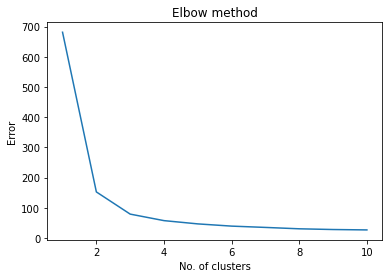

In [24]:
# Elbow method 
# Adapted from https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187
Error =[]

# Checking values of k from 1-10
for i in range(1, 11):
    # Initialise KMC model
    kmeans = skcl.KMeans(n_clusters = i)
    # Fit the model to the iris data
    kmeans.fit(X)
    # Sum of distances between values and centroids
    Error.append(kmeans.inertia_)

# Plotting the elbow method
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('Error')
plt.show()

Using KMC with just one cluster, the SSE is very large as all data is grouped with a single centroid, resulting in large distances between it and every data point. After three clusters, the SSE does not appear to shrink enough to justify creating another cluster. The elbow method therefore visually demonstrates that the best value of k for the iris data is probably three, which thankfully lines up with the number of species in the data set. Using this knowledge, KMC is run on the iris data.

First an instance of a KMC model is created with the specified number of clusters. All other parameters are left with the default values. This model is then fitted to the data.

In [25]:
# Create an instance of k-means with 3 clusters
kmeans = skcl.KMeans(n_clusters=3)

# Fit the model to the iris data
kmeans.fit(X)

KMeans(n_clusters=3)

Below shows the target labels of the original data set followed by the labels assigned to the raw data by KMC. It is worth noting that KMC will not necessarily assign the same values (0, 1, 2) to the clusters as the original but the order of the values will be the same, i.e. if the first 50 values in the original targets are 0 and the first 50 values in the model's prediction are 1, these are all referring to the same data points and should be considered the same classification. This is the case below as the first species in the data set, setosa, should be successfully clustered together given that it's quite distinct from the other two species. It is likely that the rest of the numbers in the predicted values are a bit mixed up, much like the data of versicolour and virginica were in the plots above.    

In [26]:
# Target values from original data
print("Original target values:")
print(iris.target)

# Clusters each data point was assigned to
print("\nModel's predicted values:")
print(kmeans.labels_)

Original target values:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

Model's predicted values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


The values above have been cross-tabulated to check the accuracy below. This confirms that all setosa data was correctly assigned to the same cluster but versicolour and virginica have been mislabelled in several cases.[<sup>14</sup>](http://www.philipkalinda.com/ds3.html)

In [27]:
# Compare original targets and model targets
# Adapted from http://www.philipkalinda.com/ds3.html
pd.crosstab(iris_df['species'], kmeans.labels_)

col_0,0,1,2
species,,,
setosa,0,50,0
versicolor,2,0,48
virginica,36,0,14


A large part of this is likely due to the mixture of these species, particularly in terms of sepal measurements. The sepal plot is recreated below with the centroids added.[<sup>15</sup>](https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset) This demonstrates how close together the centroids for versicolor and virginica are to one another and how the mislabeling could occur. While the majority of data points are correctly clustered, the model is far from perfect. 

Centroids:
[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


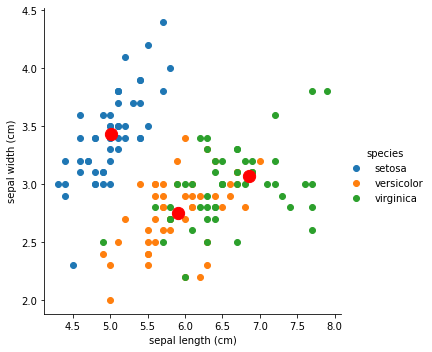

In [28]:
# Centroids for all data
centroids = kmeans.cluster_centers_
print("Centroids:")
print(centroids)

# Adding sepeal centroids to the plot 
# Adapted from https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset
sns.FacetGrid(iris2, hue = 'species', height=5).map(plt.scatter, 'sepal length (cm)', 'sepal width (cm)').add_legend()
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'red')
plt.show()

An array of new values can be passed to this model and return a prediction of what species the measurements may represent. 

In [29]:
# New data
new_vals = np.array([[4.9 , 4.5 , 2.3, 1.4], 
              [5.5, 2.5, 4.3, 0.4], 
              [6.8, 3.5, 5.7, 2.7]])

# Passing new data to the model and returning the results
for val in new_vals:
    print(f"Data: {val}")
    print(f"Prediction: {kmeans.predict([val])}\n")

Data: [4.9 4.5 2.3 1.4]
Prediction: [1]

Data: [5.5 2.5 4.3 0.4]
Prediction: [2]

Data: [6.8 3.5 5.7 2.7]
Prediction: [0]



Below the new values (light blue) for sepal length and width are plotted to show where they fall in relation to their associated centroid (red).

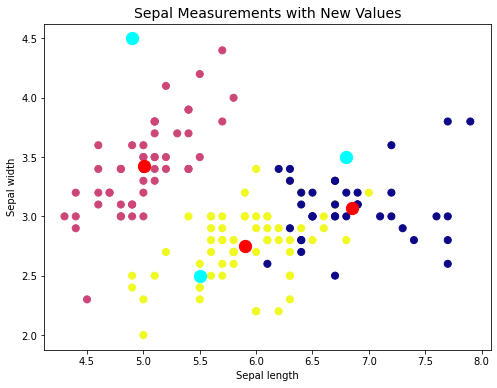

In [30]:
# Plotting new setosa values 

# Set figure size
plt.figure(figsize=(8, 6))

# Select plot type and set x and y values 
plt.scatter(iris.data[:, 0], iris.data[:, 1], marker='.', c=kmeans.labels_, cmap='plasma', s=200)

# Labels
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# Title
plt.title('Sepal Measurements with New Values', fontsize=14)

# Add cluster centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'red')

# Plot new values
plt.scatter(new_vals[:, 0], new_vals[:, 1], s = 150, c = 'cyan')

#Display plot
plt.show()

Because of the issues sepal measurements seem to cause, perhaps just using petal measurements will create a more accurate model since these values make the species appear more separable, as demonstrated in the plot below. 

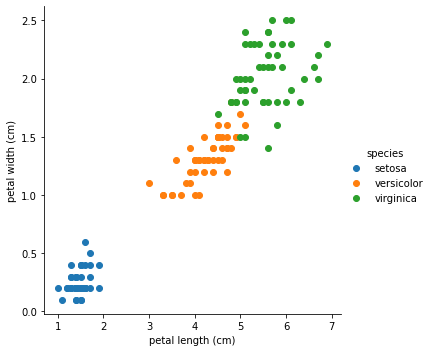

In [31]:
# Closer look at scatter plots for petal measurements.
sns.FacetGrid(iris_df, hue = 'species', height=5).map(plt.scatter, 'petal length (cm)', 'petal width (cm)').add_legend()
plt.show()

The petal data is separated and all of the above steps are repeated to make a new KMC model.

In [32]:
# Separating petal data
petal_data = X[:, 2:]

# Create model object
kmeans2 = skcl.KMeans(n_clusters=3)

# Fit model to petal data
kmeans2.fit(petal_data)

# Compare original labels to the model predictions 
pd.crosstab(iris_df['species'], kmeans2.labels_)

col_0,0,1,2
species,,,
setosa,0,50,0
versicolor,48,0,2
virginica,4,0,46


This model seems more accurate with just a small handful of data points being mislabeled. The plots below show the original petal data labels versus those predicted by the model and there is very little difference between them.[<sup>16</sup>](https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee)

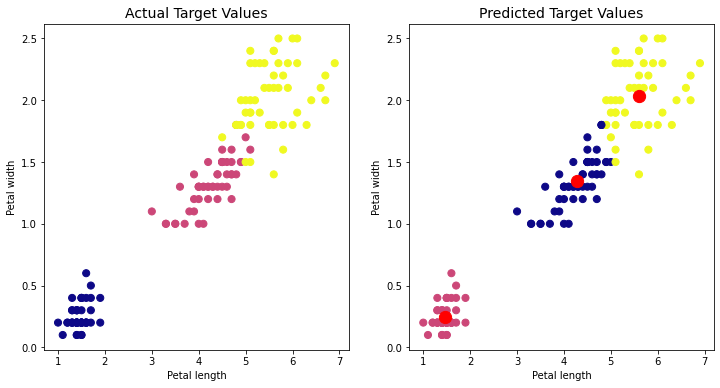

In [33]:
# Plotting adapted from
# https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee

# Create two plots
fig, axes = plt.subplots(1, 2, figsize=(12,6))

# Select plot type and data - colour according to target and labels
axes[0].scatter(petal_data[:, 0], petal_data[:, 1], marker= '.', c=iris.target, cmap='plasma', s=200)
axes[1].scatter(petal_data[:, 0], petal_data[:, 1], marker='.', c=kmeans2.labels_, cmap='plasma', s=200)

# Labels
axes[0].set_xlabel('Petal length')
axes[0].set_ylabel('Petal width')
axes[1].set_xlabel('Petal length')
axes[1].set_ylabel('Petal width')

# Titles
axes[0].set_title('Actual Target Values', fontsize=14)
axes[1].set_title('Predicted Target Values', fontsize=14)

# Add centroids to predicted data
plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s = 150, c = 'red')

#Display plot
plt.show()

Because KMC does not use the data set labels to train the model, traditional sklearn metrics such as accuracy_score will not be useful.[<sup>17</sup>](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a) Evaluation of the accuracy of the model depends less on calculated metrics and more on interpretation[<sup>18<sup>](https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee) but there are some metrics that can help to evaluate the model such as the silhouette score. This measures how separated the clusters are as well as their density[<sup>19</sup>](https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam) This test is implemented below for both models created above.

In [34]:
from sklearn.metrics import silhouette_score

# All data
print("Silhouette score for all data:")
print(silhouette_score(X, kmeans.labels_))

# Petal data
print("\nSilhouette score for all data:")
print(silhouette_score(X, kmeans2.labels_))

Silhouette score for all data:
0.5528190123564091

Silhouette score for all data:
0.5221721385945108


The closer the value is to 1, the more dense and well-separated the clusters are. The scores above are very similar, with the score for the whole data set being slightly closer to 1, indicating little difference between the model clusters in this case. Despite this, the second model was more accurate in terms of correctly labeling the data. However, KMC is generally used to find patterns in raw data, not data that already has labels such as the Iris data set[<sup>20</sup>](https://www.freecodecamp.org/news/how-to-build-and-train-k-nearest-neighbors-ml-models-in-python/) and so perhaps a supervised machine learning algorithm might be more suitable to build a predictive model for this data.

### Addendum:

Per email received 16/12/20, the task should have been to run K-Nearest Neighbors (KNN) rather than K-Means Clustering on the Iris Dataset. The task was already completed at this stage and so has not been altered but I refer to my previous attempt to apply KNN.[<sup>21</sup>](https://github.com/jennifer-ryan/iris-data-set-project)

## References

1. Creating iris dataframe with target number and species name adapted from: http://www.philipkalinda.com/ds3.html
2. KMC definition: https://en.wikipedia.org/wiki/K-means_clustering
3. How KMC works: https://towardsdatascience.com/how-does-k-means-clustering-in-machine-learning-work-fdaaaf5acfa0
4. k-means++: https://en.wikipedia.org/wiki/K-means%2B%2B
5. Default initialisation in sklearn KMC: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
6. Number of iterations: https://realpython.com/k-means-clustering-python/
7. Inertia in KMC: https://scikit-learn.org/stable/modules/clustering.html
8. Splitting the data: https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee
9. Previous iris data set analysis by author: https://github.com/jennifer-ryan/iris-data-set-project
10. No need for train/test split: https://www.freecodecamp.org/news/how-to-build-and-train-k-nearest-neighbors-ml-models-in-python/
11. Optimal number of clusters: https://realpython.com/k-means-clustering-python/
12. Elbow Method adapted from: https://heartbeat.fritz.ai/k-means-clustering-using-sklearn-and-python-4a054d67b187
13. Diminishing returns of increasing k value: https://stackoverflow.com/a/41525972
14. Cross-tabulation adapted from: http://www.philipkalinda.com/ds3.html
15. Adding centroids to plots adapted from: https://www.kaggle.com/tonzowonzo/simple-k-means-clustering-on-the-iris-dataset
16. Side-by-side plots adapted from: https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee
17. Traditional metrics and KMC: https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a
18. Evaluating KMC accuracy: https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee
19. Silhouette Score: https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam
20. KMC used for raw data rather than labeled: https://www.freecodecamp.org/news/how-to-build-and-train-k-nearest-neighbors-ml-models-in-python/
21. Addendum - previous attempt at KNN: https://github.com/jennifer-ryan/iris-data-set-project